In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("D:\Practise\Kaggle\Regression\Medical Price\insurance\insurance.csv")
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


In [5]:
#from info we can see that there is no null values in any column
#let's recheck it
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


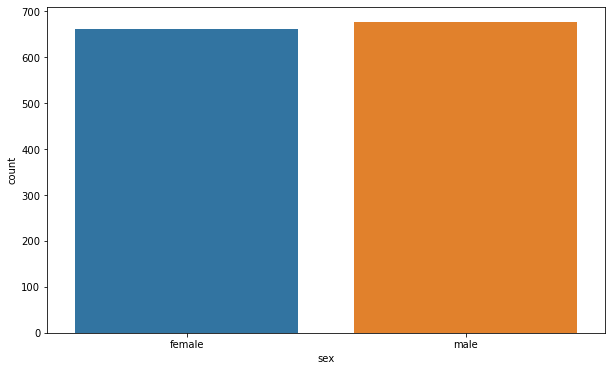

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(df['sex'])

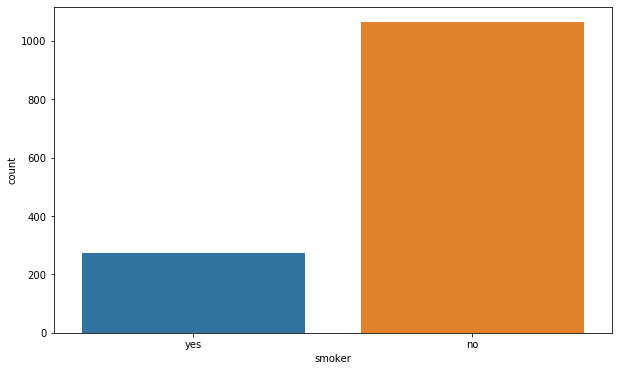

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(df['smoker'])

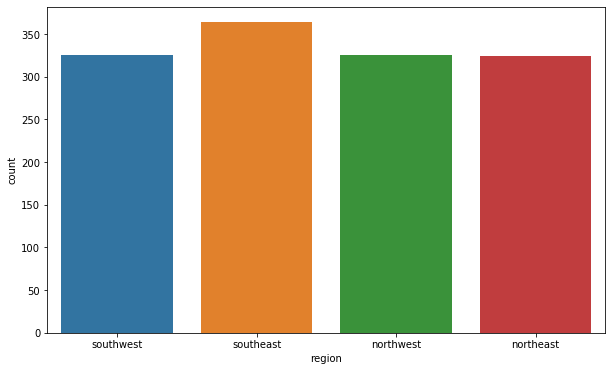

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(df['region'])

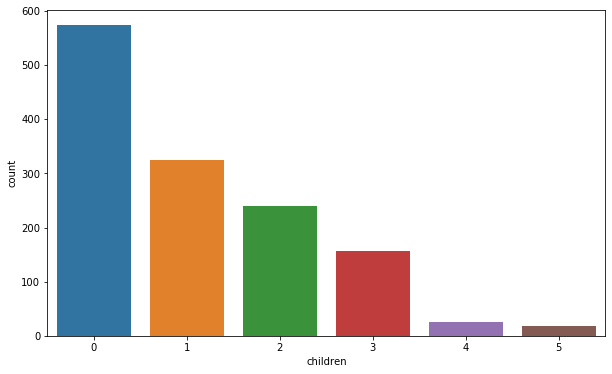

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(df['children'])

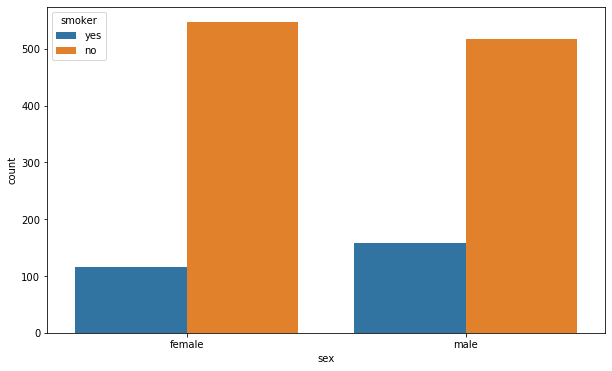

In [11]:
'''from the above 4 count plots we concluded following points
1.The dataset have approximately equal distribution of male and female
2.Also all the datapoints are equally distributed in four regions 
2.However more people are not smoker and more people have no childrens'''
plt.figure(figsize=(10,6))
sns.countplot(df['sex'],hue=df['smoker'])



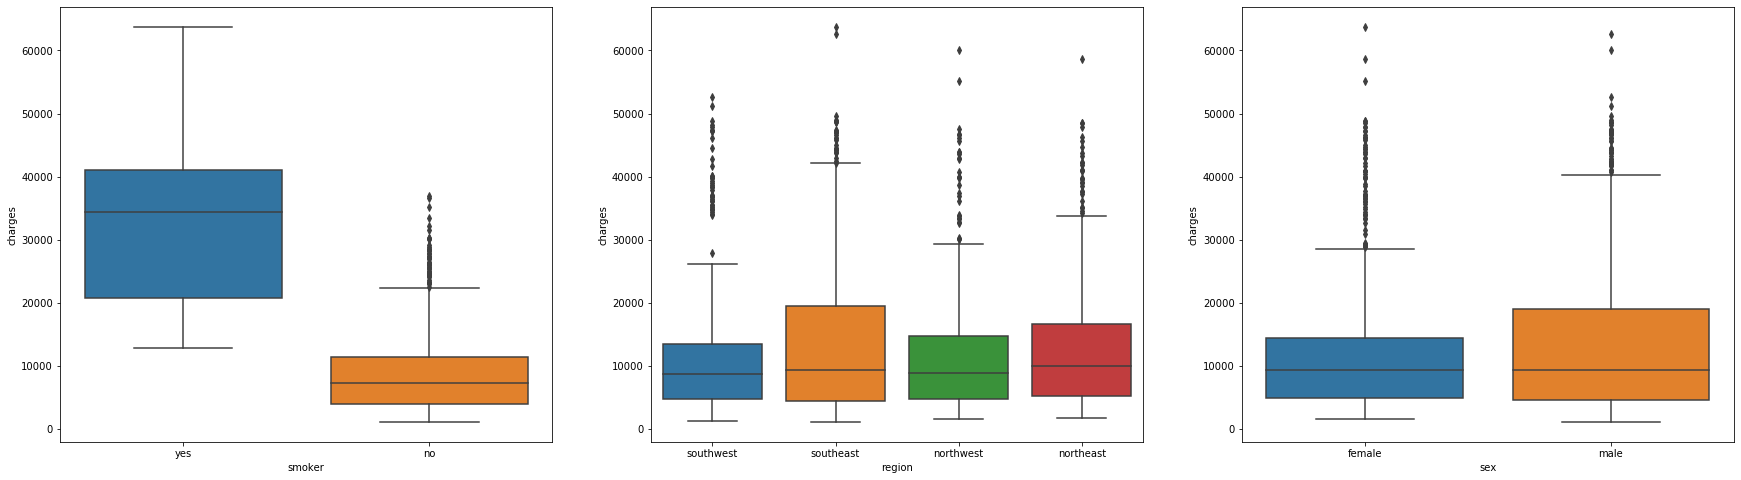

In [12]:
#More no of male smoker than female smoker
fig,axes=plt.subplots(1,3,figsize=(30,8),squeeze=False)
sns.boxplot(df['smoker'],df['charges'],ax=axes[0][0])
sns.boxplot(df['region'],df['charges'],ax=axes[0][1])
sns.boxplot(df['sex'],df['charges'],ax=axes[0][2])

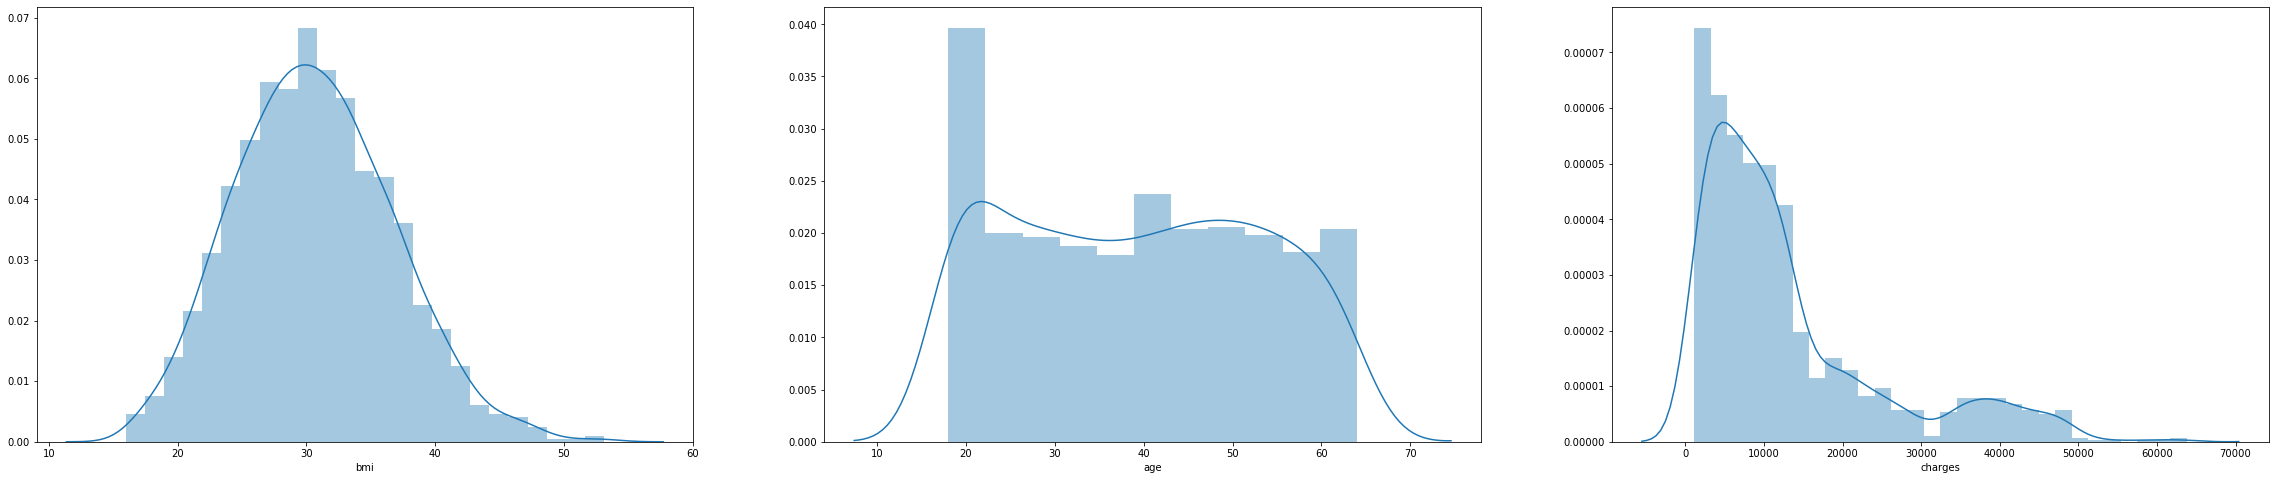

In [13]:
'''From these 3 plots we concluded that 
1.mean charges of smokers are more than that of non smokers
2.mean charges of all regions are almost same but the southeast residents have more charges than other
3.same  thing for the males'''
fig,axes=plt.subplots(1,3,figsize=(40,8),squeeze=False)
sns.distplot(df['bmi'],ax=axes[0][0])
sns.distplot(df['age'],ax=axes[0][1])
sns.distplot(df['charges'],ax=axes[0][2])

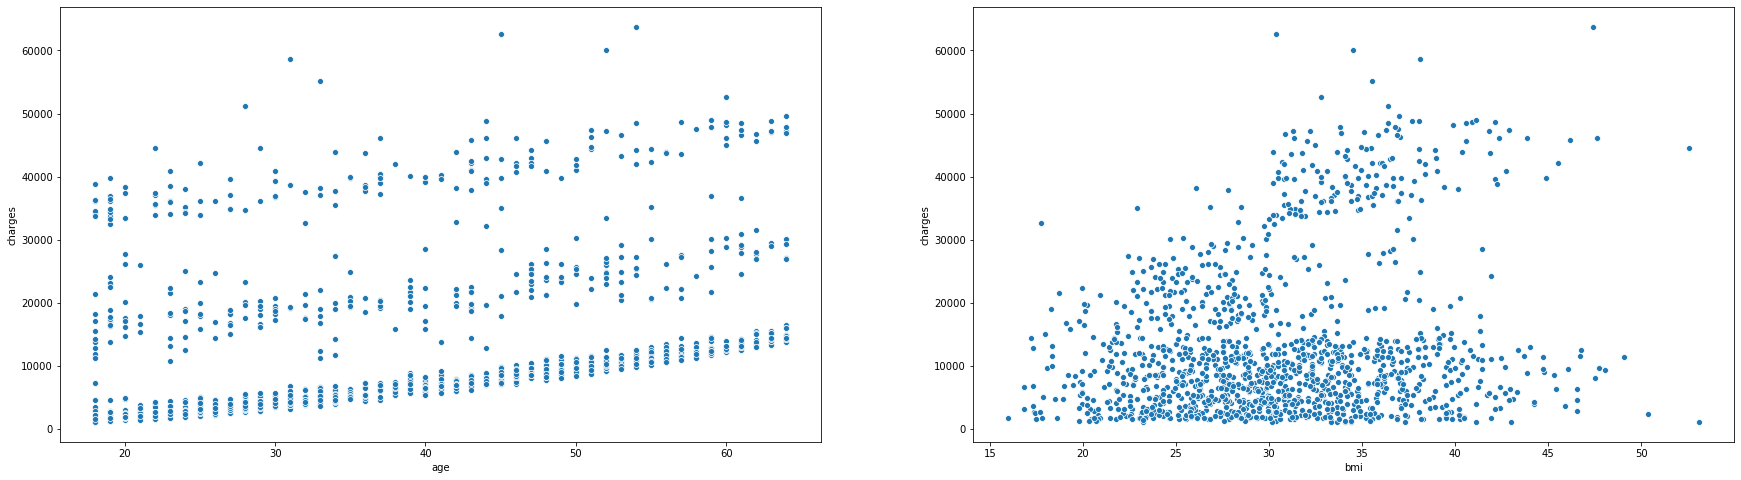

In [14]:
fig,axes=plt.subplots(1,2,figsize=(30,8),squeeze=False)
sns.scatterplot(df['age'],df['charges'],ax=axes[0][0])
sns.scatterplot(df['bmi'],df['charges'],ax=axes[0][1])

In [15]:
#from these two plots we can conclude that age and bmi columns are positively co-related with charges column
df=pd.get_dummies(data=df,columns=['sex','smoker','region','children'],drop_first=True)
df.head(2)

,age,bmi,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,children_1,children_2,children_3,children_4,children_5
0,19,27.90,16884.9240,0,1,0,0,1,0,0,0,0,0
1,18,33.77,1725.5523,1,0,0,1,0,1,0,0,0,0


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['charges'],axis=1),df['charges'],test_size=0.2,random_state=0)
len(x_train)

1070

In [17]:
from sklearn.preprocessing import StandardScaler
sc1=StandardScaler()
sc2=StandardScaler()
x_train=sc1.fit_transform(x_train)
x_test=sc1.fit_transform(x_test)
y_train=sc2.fit_transform(y_train.values.reshape(-1,1))
y_test=sc2.fit_transform(y_test.values.reshape(-1,1))

In [18]:
from sklearn.linear_model import LinearRegression
mod1=LinearRegression()
mod1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
y_pred1=mod1.predict(x_test)
from sklearn.metrics import mean_squared_error
print("\n Mean Squared error is",mean_squared_error(y_test,y_pred1))


 Mean Squared error is 0.19946714645567204


In [20]:
train_scr=[]
test_scr=[]
train_scr.append(mod1.score(x_train,y_train))
test_scr.append(mod1.score(x_test,y_test))
print("\n Training score is",mod1.score(x_train,y_train))
print("\n Testing score is",mod1.score(x_test,y_test))


 Training score is 0.7386603439385642

 Testing score is 0.800532853544328


In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
prm={'n_neighbors':[3,4,5,6,7,8]}
model=KNeighborsRegressor()
mod2=GridSearchCV(model,param_grid=prm,cv=5)
mod2.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [22]:
mod2.best_params_

{'n_neighbors': 6}

In [23]:
mod2.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')

In [24]:
y_pred2=mod2.predict(x_test)
print("\n Mean Squared error is",mean_squared_error(y_test,y_pred2))


 Mean Squared error is 0.24484097311234707


In [25]:
train_scr.append(mod2.score(x_train,y_train))
test_scr.append(mod2.score(x_test,y_test))
print("\n Training score is",mod2.score(x_train,y_train))
print("\n Testing score is",mod2.score(x_test,y_test))


 Training score is 0.814968212683072

 Testing score is 0.755159026887653


In [26]:
from sklearn.tree import DecisionTreeRegressor
model1=DecisionTreeRegressor()
par1={'max_leaf_nodes':[1,2,3],'criterion':['mse','mae']}
mod3=GridSearchCV(model1,param_grid=par1,cv=5)
mod3.fit(x_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_leaf_nodes': [1, 2, 3]},
             pre_dispatch='2*n_jobs', refit=Tr

In [27]:
mod3.best_params_

{'criterion': 'mse', 'max_leaf_nodes': 3}

In [28]:
y_pred3=mod3.predict(x_test)
print("\n Mean Squared error is",mean_squared_error(y_test,y_pred3))


 Mean Squared error is 0.20249090949979423


In [29]:
train_scr.append(mod3.score(x_train,y_train))
test_scr.append(mod3.score(x_test,y_test))
print("\n Training score is",mod3.score(x_train,y_train))
print("\n Testing score is",mod3.score(x_test,y_test))


 Training score is 0.7503319876502401

 Testing score is 0.7975090905002058


In [30]:
from sklearn.ensemble import RandomForestRegressor
par2={'n_estimators':np.arange(100,400,10),'criterion':['mse','mae'],'max_leaf_nodes':[1,2,3,4]}
model2=RandomForestRegressor()
mod4=GridSearchCV(model2,param_grid=par2,cv=5)
mod4.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, rand...
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
  

In [31]:
mod4.best_params_

{'criterion': 'mse', 'max_leaf_nodes': 4, 'n_estimators': 240}

In [32]:
y_pred4=mod4.predict(x_test)
print("\n Mean Squared error is",mean_squared_error(y_test,y_pred4))


 Mean Squared error is 0.14461713290226932


In [33]:
train_scr.append(mod4.score(x_train,y_train))
test_scr.append(mod4.score(x_test,y_test))
print("\n Training score is",mod4.score(x_train,y_train))
print("\n Testing score is",mod4.score(x_test,y_test))


 Training score is 0.8206785291978683

 Testing score is 0.8553828670977307


In [34]:
train_scr

[0.7386603439385642, 0.814968212683072, 0.7503319876502401, 0.8206785291978683]

In [35]:
test_scr

[0.800532853544328, 0.755159026887653, 0.7975090905002058, 0.8553828670977307]

In [37]:
algos=['Linear-Regression','KNeighborsClassifier','Decision-Tree','Random-Forest']
compar_df=pd.DataFrame(columns=['Training','Testing'],index=algos)
compar_df['Training']=train_scr
compar_df['Testing']=test_scr
compar_df

,Training,Testing
Linear-Regression,0.738660,0.800533
KNeighborsClassifier,0.814968,0.755159
Decision-Tree,0.750332,0.797509
Random-Forest,0.820679,0.855383


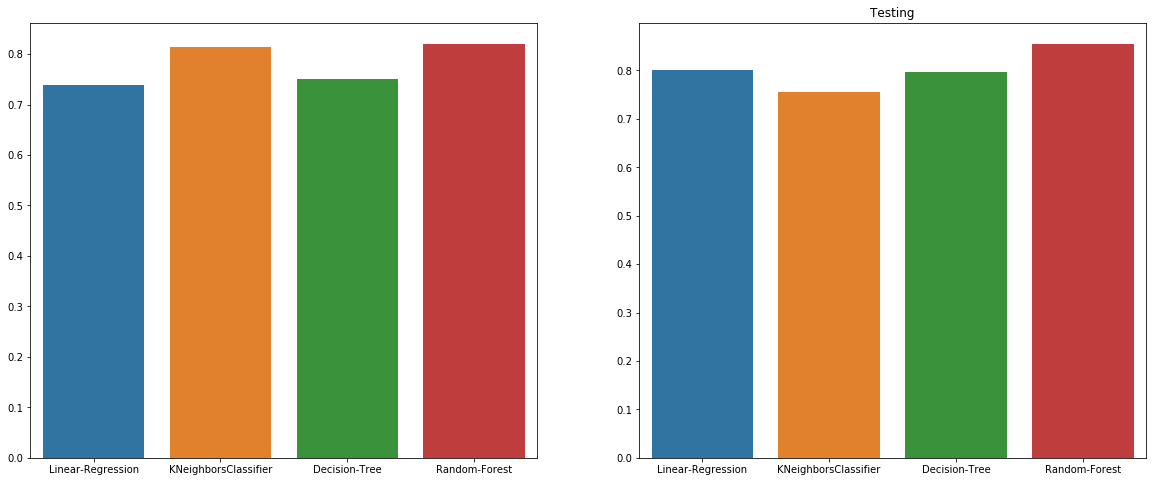

In [38]:
fig,axes=plt.subplots(1,2,figsize=(20,8),squeeze=False)
plt.title("Training")
sns.barplot(algos,train_scr,ax=axes[0][0])
plt.title("Testing")
sns.barplot(algos,test_scr,ax=axes[0][1])

In [ ]:
#We can see that the Random Forest Regressor Performed very well with a mean squared error of 0.14461 which is least of all algorithms.And the score for training and testing were 0.82069 and 0.855383 which were quite good